In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score

In [25]:
data = pd.read_csv("../data/subset_dataset_frunza_roxana.csv")

In [26]:
data.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
0,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,145000
1,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,178000
2,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,85000
3,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,175000
4,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,127000


In [27]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd']

In [28]:
X = data[selected_features]
y = data["SalePrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

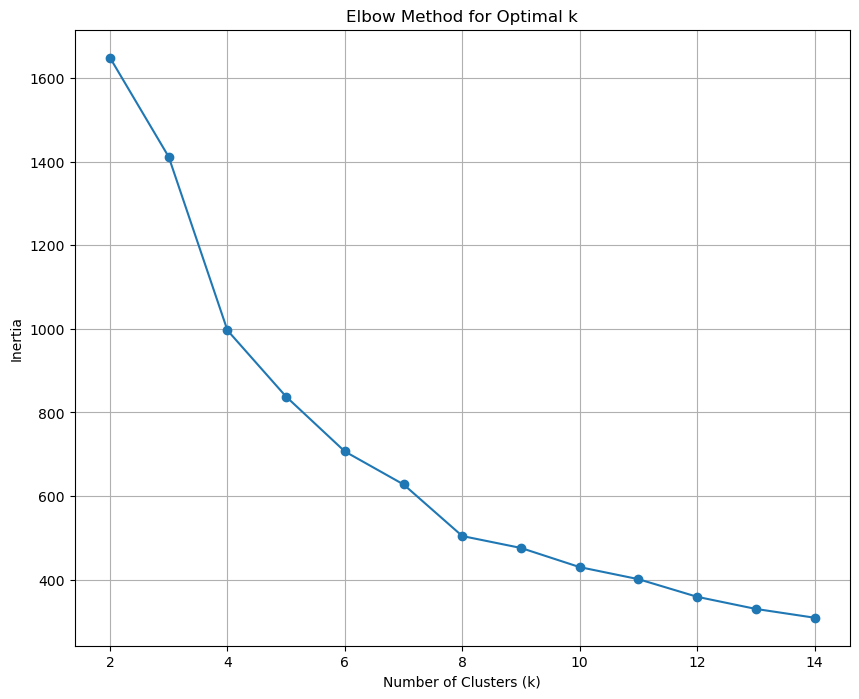

In [29]:
inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


    The Elbow Method plot shows a clear inflection around k = 4–6, suggesting this as an optimal range for cluster count

In [30]:
kmeans = KMeans(n_clusters=10, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

In [31]:
kmeans_summary = data.groupby("Cluster")["SalePrice"].agg(["mean", "median", "std", "count"])
print(kmeans_summary)

                  mean    median           std  count
Cluster                                              
0        201500.042705  194500.0  40227.839817    281
1        164820.190476  159500.0  44443.557939    105
2        121583.756098  115000.0  33623.539276     41
3         91477.551020   93000.0  25684.928016     49
4        303742.965318  285000.0  88250.499122    173
5        150814.500000  144950.0  35202.765147    100
6        130526.705263  122000.0  38156.844081     95
7        129769.581250  129250.0  26239.091934    160
8        161039.064815  155500.0  30972.217259    108
9        184721.125000  162000.0  77915.591189     56


In [32]:
feature_means = data.groupby("Cluster")[X.columns].mean()
feature_means

,OverallQual,YearBuilt,YearRemodAdd
Cluster,,,
0,6.693950,2000.138790,2001.715302
1,6.228571,1966.323810,1967.019048
2,4.658537,1914.585366,1998.780488
3,3.612245,1932.265306,1951.346939
4,8.335260,2002.161850,2003.219653
5,5.060000,1960.420000,2000.810000
6,5.694737,1926.673684,1950.578947
7,4.793750,1961.343750,1962.312500
8,5.694444,1978.731481,1982.944444


In [33]:
fig = px.scatter(
    data,
    x="OverallQual",
    y="YearBuilt",
    color="Cluster",
    size="SalePrice",
    title="Clusters by OverallQual and YearBuilt"
)
fig.show()


In [34]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="OverallQual",
    color="Cluster",
    size="SalePrice",
    title="Clusters by YearRemodAdd and OverallQual"
)
fig.show()


In [35]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="YearBuilt",
    color="Cluster",
    size="SalePrice",
    title="Clusters by YearRemodAdd and YearBuilt"
)
fig.show()


In [36]:
fig_box = px.box(
    data,
    x="Cluster",
    y="SalePrice",
    color="Cluster",
    title="SalePrice distribution across clusters"
)
fig_box.show()

    The K-Means algorithm managed to group houses by similar characteristics that also align with their sale prices, even without using SalePrice during training.

    Higher-quality and newer houses (Cluster 4) formed high-price groups.Older or lower-quality houses (Clusters 2 and 3) had the lowest prices
    
    Mid-range clusters contained average-quality, moderately priced homes


In [37]:
K = range(2, 15)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.2f}")

k = 2, Silhouette Score = 0.47
k = 3, Silhouette Score = 0.34
k = 4, Silhouette Score = 0.40
k = 5, Silhouette Score = 0.39
k = 6, Silhouette Score = 0.38
k = 7, Silhouette Score = 0.38
k = 8, Silhouette Score = 0.42
k = 9, Silhouette Score = 0.39
k = 10, Silhouette Score = 0.40
k = 11, Silhouette Score = 0.41
k = 12, Silhouette Score = 0.41
k = 13, Silhouette Score = 0.43
k = 14, Silhouette Score = 0.43


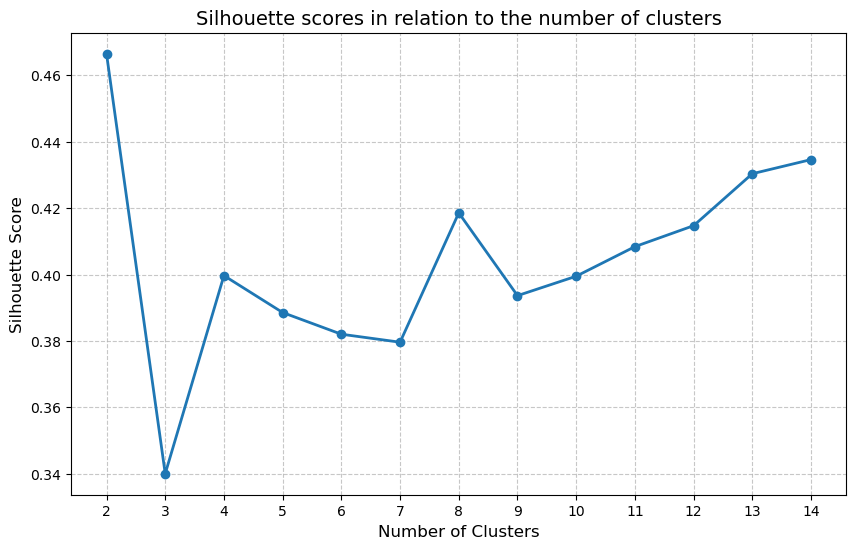

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', linestyle='-', linewidth=2)
plt.title("Silhouette scores in relation to the number of clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(K)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [39]:
optimal_value_k = K[silhouette_scores.index(max(silhouette_scores))]
optimal_value_k

2

In [40]:
kmeans_optimal = KMeans(n_clusters=optimal_value_k, random_state=42)
data["Kmeans_with_Sillhoutte"] = kmeans_optimal.fit_predict(X_scaled)

In [41]:
fig = px.scatter(
    data,
    x="OverallQual",
    y="YearBuilt",
    color="Kmeans_with_Sillhoutte",
    size="SalePrice",
    hover_data=["SalePrice"],
    title=f"Clusters by OverallQual and YearBuilt"
)
fig.show()


In [42]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="OverallQual",
    color="Kmeans_with_Sillhoutte",
    size="SalePrice",
    title="Clusters by YearRemodAdd and OverallQual"
)
fig.show()

In [43]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="YearBuilt",
    color="Kmeans_with_Sillhoutte",
    size="SalePrice",
    title="Clusters by YearRemodAdd and YearBuilt"
)
fig.show()


/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_71495/1581655396.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




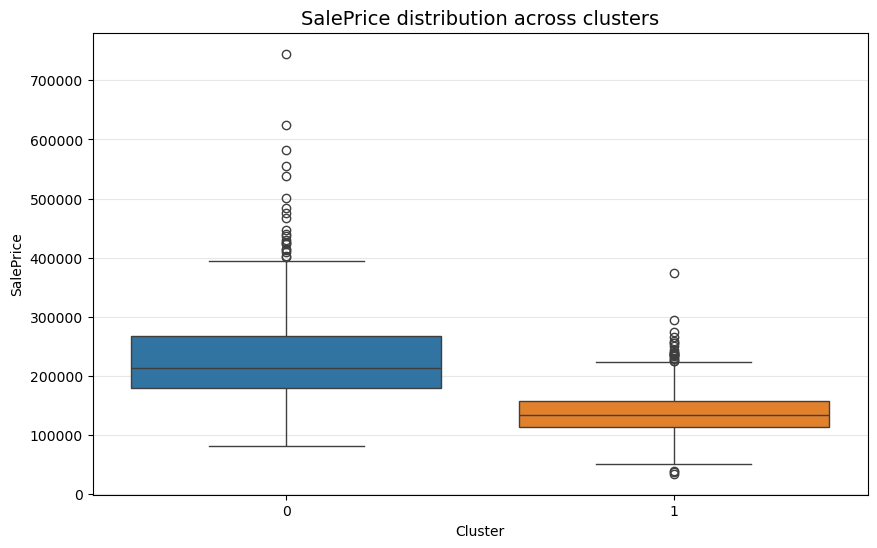

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Kmeans_with_Sillhoutte",
    y="SalePrice",
    palette="tab10"
)
plt.title(f"SalePrice distribution across clusters", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("SalePrice")
plt.grid(axis='y', alpha=0.3)
plt.show()


    The maximum Silhouette Score was 0.47 for k = 2, showing moderate separation with some overlap between clusters. The Silhouette method s result (k = 2) is different from the Elbow method, which suggested k = 4–6, meaning the two methods identify different cluster structures in the data.

    The clustering results relate to SalePrice. Clusters with higher OverallQual, YearBuilt, and YearRemodAdd values generally include more expensive houses, while those with lower values represent older and cheaper homes.

In [51]:
kmeans = KMeans(n_clusters=2, random_state=42)
data["Label"] = kmeans.fit_predict(X_scaled)

df = data[selected_features + ["Label", "SalePrice"]]
cluster_means = df.groupby("Label")["SalePrice"].mean()
print(cluster_means)

Label
0    233484.353933
1    137607.375394
Name: SalePrice, dtype: float64


In [52]:
df_final = df.drop(columns=["SalePrice"])

In [53]:
output_path = "../data/subset_classification_frunza_roxana.csv"
df_final.to_csv(output_path, index=False)